# Clustering
- An unsupervised method: no labels!
- Predictive vs descriptive clustering

## Applications
- Trends in data
- Data compression (e.g. image colour depth)
- Pattern recognition

# K-means clustering
Search for centroids that minimise the within-cluster scatter

Algorithm:

0. Until clusters don't change:
    1. Choose _k_ means at random
    2. For each point _x_ in data _D_
        - Calculate the closest mean, assign _x_ to that cluster
        - Update the means

<div class="alert alert-block alert-info">
<b>Tip:</b> <a href="https://hckr.pl/k-means-visualization/">Example</a>
</div>


## Choosing the number of clusters
![k-means xkcd comic](images/480px-k_means_clustering_2x.png)

## In scikit-learn

In [2]:
# imports
import sklearn.cluster as skl_cluster # sklearn clustering module
import sklearn.datasets as skl_datasets # datasets module to create random blobs

In [3]:
# generate data
data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=42)

In [4]:
# cluster using k-means
kmeans = skl_cluster.KMeans(n_clusters=4)
kmeans.fit(data)
clusters = kmeans.predict(data)

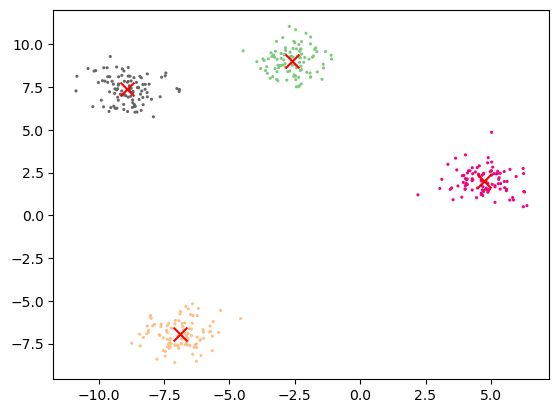

In [10]:
# plot results
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters,cmap="Accent") # colour by cluster
for cluster_x, cluster_y in kmeans.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x') # plot centroids
plt.show()

## Advantages of K-means
- Simple and fast
- Good first choice
- Low memory requirements

## Limitations of K-means
- Struggles with irregularly shaped clusters
- Get an answer even if data is not clustered
- Requires linearly separable data:

    ![circles](images/linsep.png)

## Exercises

Adjust the program above to increase the standard deviation of the blobs (the cluster_std parameter to make_blobs) and increase the number of samples (n_samples) to 4000. You should start to see the clusters overlapping. Do the clusters that are identified make sense? Is there any strange behaviour from this?


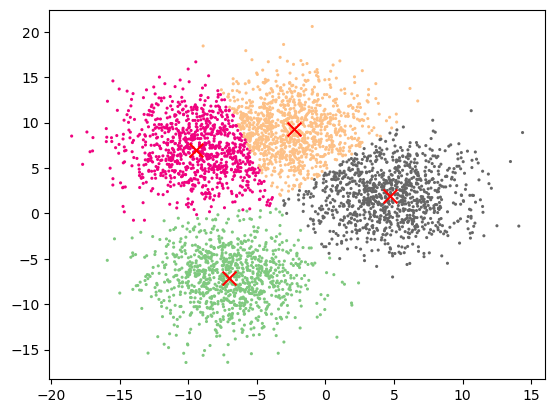

In [11]:
# generate data
data, cluster_id = skl_datasets.make_blobs(n_samples=4000, cluster_std=3, centers=4, random_state=42)
# cluster using k-means
kmeans = skl_cluster.KMeans(n_clusters=4)
kmeans.fit(data)
clusters = kmeans.predict(data)

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters,cmap="Accent") # colour by cluster
for cluster_x, cluster_y in kmeans.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x') # plot centroids
plt.show()

As K-Means requires us to specify the number of clusters to expect a common strategy to get around this is to vary the number of clusters we are looking for. Modify the program to loop through searching for between 2 and 10 clusters. Which (if any) of the results look more sensible? What criteria might you use to select the best one?

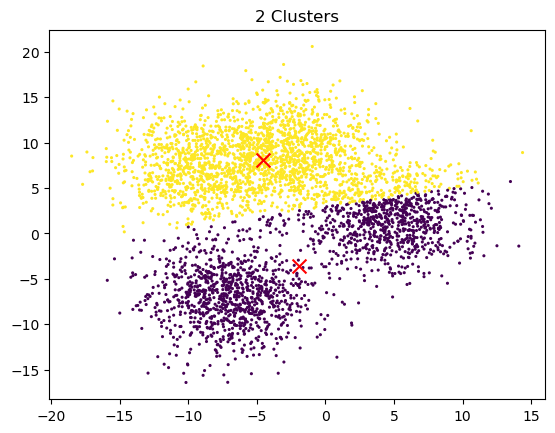

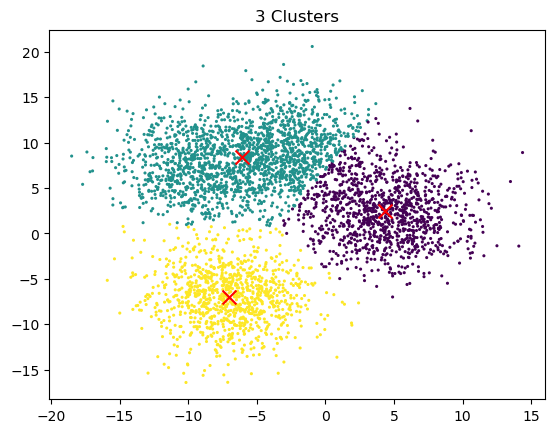

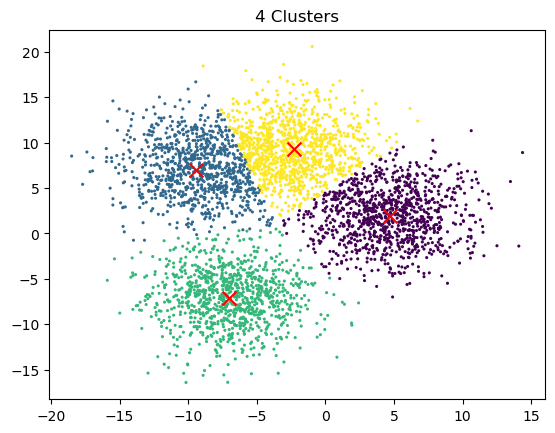

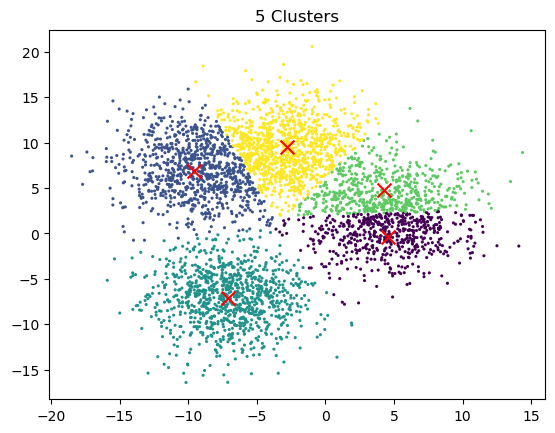

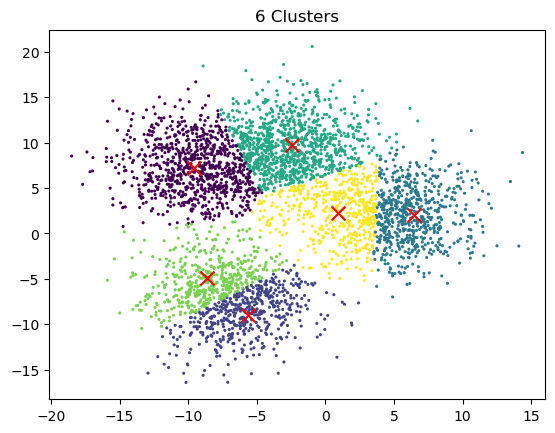

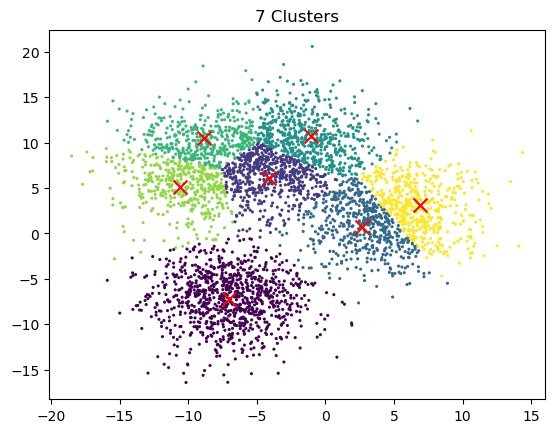

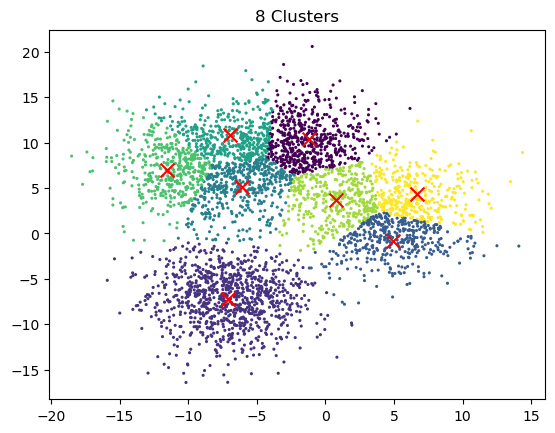

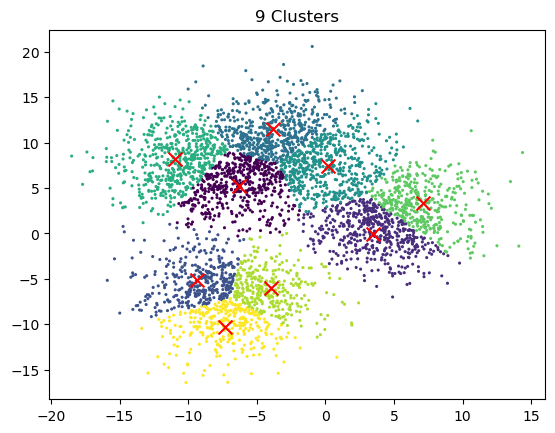

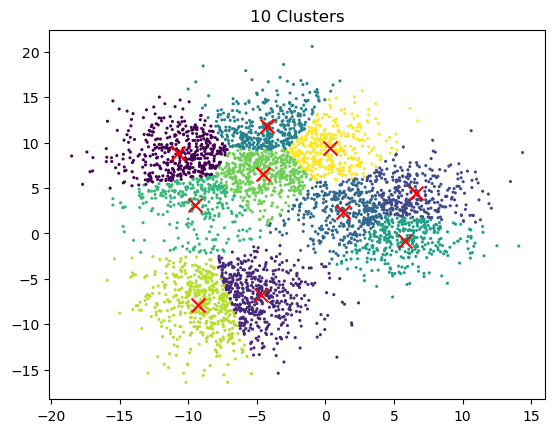

In [12]:
for cluster_count in range(2,11):
    kmeans = skl_cluster.KMeans(n_clusters=cluster_count)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0,c=clusters)
    for cluster_x, cluster_y in kmeans.cluster_centers_:
        plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
        # give the graph a title with the number of clusters
        plt.title(str(cluster_count)+" Clusters")
    plt.show()

# Non-linear data
- [Kernel trick](https://www.youtube.com/watch?v=OdlNM96sHio)
- Spectral clustering

## Spectral clustering
- Treat data as graph instead of using normal distance metric
- Use adjacency matrix to reduce dimensions
- Use K-means on reduced data

- Much more computationally expensive (memory also)

# Spectral Clustering in scikit-learn


In [13]:
circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

In [14]:
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [15]:
labels = model.fit_predict(circles)

/home/julia/miniconda3/envs/sklearn-carpentry/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


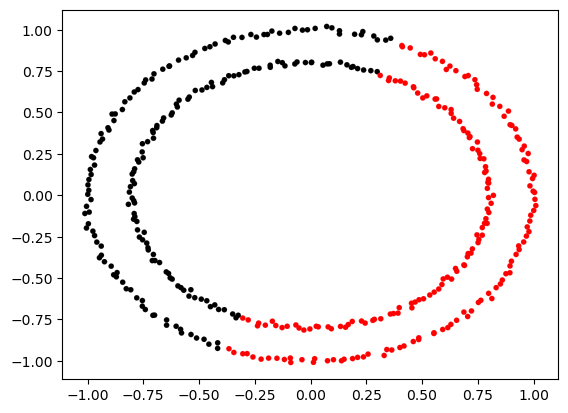

/home/julia/miniconda3/envs/sklearn-carpentry/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


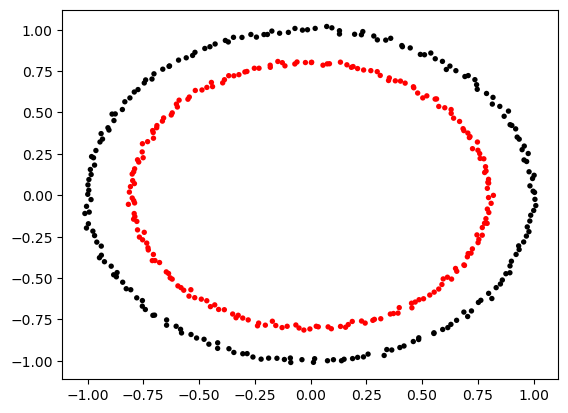

In [18]:
# compare kmeans and spectral clustering
circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.show()

## Exercises
Modify the program we wrote in the previous exercise to use spectral clustering instead of k-means, save it as a new file. Time how long both programs take to run. Add the line import time at the top of both files, as the first line in the file get the start time with `start_time = time.time()`. End the program by getting the time again and subtracting the start time from it to get the total run time. Add `end_time = time.time()` and `print("Elapsed time:",end_time-start_time,"seconds")` to the end of both files. Compare how long both programs take to run generating 4,000 samples and testing them for between 2 and 10 clusters. How much did your run times differ? How much do they differ if you increase the number of samples to 8,000? How long do you think it would take to compute 800,000 samples (estimate this, it might take a while to run for real)?

In [ ]:
# k-means version, about 4 seconds
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)

    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=clusters)
    plt.title(str(cluster_count)+" Clusters")

plt.show()

end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")

In [ ]:
# spectral
start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    model = skl_cluster.SpectralClustering(n_clusters=cluster_count,
                                       affinity='nearest_neighbors',
                                       assign_labels='kmeans')
    labels = model.fit_predict(data)
    
    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=labels)
    plt.title(str(cluster_count)+" Clusters")
plt.show()
end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")